<a href="https://colab.research.google.com/github/keithvtls/AIDA2-CpE---AIML/blob/main/Laboratory%2005/58052_Multiple_Linear_Regression_Data_Halaman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 4 Lab 2: Multiple Linear Regression

## $_{\text{© Data Halaman: C. Canoza, I.J. Timbungco, N.K. Vitales, S.C. Zarraga | 2022 | Fudamentals of Machine Learning}}$

# Part 1
Create a class named `MultipleLinearRegression()` wherein it can compute for the linear regression for multiple variables. The class will be required to have the following helper methods:
> 1. `correlations(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: A vector that contains the covariances of each feature to the target. 
> 3. `train(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: the weights of the linear regressor. Use least squares method for this part. If the training fails due to the singularity of the matrix, raise a custom error pertaining to autocorrelation.
> 4. `predict(x)`
>> input: A testing vector. *Note*: this function should only accept vectors.
>>
>> output: the predicted value. Note: the procedure in solving for the predicted value should be vectorized. Use the concept of matrix multiplication. Do not forget to pad the matrix for the bias term.
> 5. `evaluate()`
>> input: *none*
>>
>> output: a `DataFrame` that displays the SST, SSR, SSE, MSE, RMSE, R-squared, and the Adjusted R-squared. Note: You should use the `predict()` method here.
> 5. `visualize(testX, testY)`
>> input: the dataset training sets and their ground truths.
>>
>> output: a visualization of the linear regressor over the testing dataset. It should be saved as a .jpg file into the running notebook with a dpi of 400.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
## No other packages or libraries can be added in this cell

In [ ]:
import requests
url = "https://raw.githubusercontent.com/keithvtls/AIDA2-CpE---AIML/main/Laboratory%2005/real_estate_price_size_year.csv"
res = requests.get(url, allow_redirects=True)
with open('real_estate_price_size_year.csv','wb') as file:
    file.write(res.content)
X = pd.read_csv('real_estate_price_size_year.csv')

In [ ]:
X

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


In [ ]:
### YOUR CODE HERE
class MultipleLinearRegression():
  def correlations(self,X,y):
    self.R  =np.corrcoef(X,y,rowvar=False).round(2).reshape(1,9)[0][-4:-2]
    return print(f'R = {self.R}')

  def train(self, X,y):
    X_T = np.c_[np.ones(len(X_train)), X_train]    
    #error = np.linalg.norm(X_T.dot(theta) - y, ord=2)**2
    self.theta = np.linalg.pinv(X_T.T.dot(X_T)).dot(X_T.T).dot(y_train).reshape(3,1)
    self.model_ =(np.array([self.theta[-2],self.theta[-1],self.theta[0]]))

  def predict(self, x):
    self.y_hat = np.array(np.c_[np.ones((len(X_test), 1)), X_test])
    i = np.arange(0,5)
    self.preds = (np.dot(self.y_hat, self.theta)).round(2)
    return self.preds,i

  def evaluate(self):
    y = y_train.values[:,np.newaxis] 
    y_hat = np.arange(5*5).reshape(5,5)
    sst = np.sum(np.square(y)-(np.mean(y)))
    ssr = np.sum(np.square(self.y_hat)-(np.mean(y)))
    mse=np.mean(np.square(y_hat-y[0:5]))
    rsme = (np.sqrt(np.mean(np.sum(np.square(self.y_hat)))))
    r2 = (self.R**2)
    ar2 = (1-((1-r2)*(len(y)-1)/(len(y)-len(X)-1)))
    evaluate = {'SST': sst, 'SSR': ssr,'MSE': mse,'RSME': rsme,
        'R-squared': r2,'Adjusted R-squared': ar2                      
    }  
    df = pd.DataFrame(evaluate)
    return df

  def visualize(self,testX, testY):
    fig, ax = plt.subplots()
    regressor = plt.scatter(y_test, self.preds, color= 'green')
    plt.grid()
    ax.set_xlabel('True Values')
    ax.set_ylabel('Fitted Values')
    ax.set_title('True Value vs. Fitted Values');
    plt.savefig(f'Linear Regressor.jpg', dpi=400)
    return fig,ax, plt.show()

In [ ]:
### Testing Data
### DO NOT DELETE NOR MODIFY THIS CELL
### Data can be retrieved from the git repo
# X = pd.read_csv("https://github.com/keithvtls/AIDA2-CpE---AIML/blob/main/Laboratory%2005/real_estate_price_size_year.csv") 
y = X['price']
X = X.drop('price', axis=1)
X_train, X_test = X.iloc[0:95], X.iloc[95:]
y_train, y_test = y.iloc[0:95], y.iloc[95:]

In [ ]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = MultipleLinearRegression()

In [ ]:
## TEST #2 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
R = regressor.correlations(X,y)
R

R = [0.09 0.86]


Expected output value:
$$R = \begin{bmatrix}0.09 & 0.86\end{bmatrix}$$

In [ ]:
## TEST #3 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.train(X_train,y_train)
regressor.model_

array([[ 2.32557432e+02],
       [ 3.01009344e+03],
       [-5.96417493e+06]])

Expected output value:
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_2 \\ \omega_0\end{bmatrix} = \begin{bmatrix}232.56\\ 3010.09 \\ -5964175.03\end{bmatrix}$$

In [ ]:
## TEST #4 (Max pts: 35)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = regressor.predict(X_test)
preds

(array([[210962.87],
        [324367.18],
        [424013.31],
        [251928.01],
        [238092.94]]), array([0, 1, 2, 3, 4]))

Expected output value:
$$\hat{y}_i = \begin{bmatrix} 210962.87 \\ 324367.17 \\ 424013.31 \\ 251928.01 \\ 238092.94 \end{bmatrix}, i = \{0,1,2,3,4\}$$

In [ ]:
# TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
model_stats = regressor.evaluate()
model_stats

,SST,SSR,MSE,RSME,R-squared,Adjusted R-squared
0,8.697436e+12,2.035434e+07,1.115619e+11,4974.033802,0.0081,16.539767
1,8.697436e+12,2.035434e+07,1.115619e+11,4974.033802,0.7396,5.079600


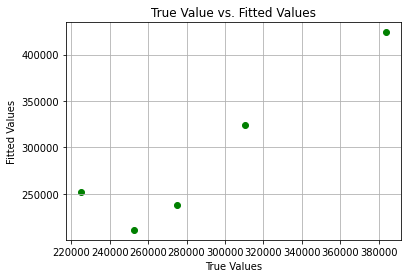

(<Figure size 432x288 with 1 Axes>,
 None)

In [ ]:
## TEST #6 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.visualize(X_test, y_test)

# Part 2
## 2.1 Lecture Requirement

Obtain a dataset of your liking from a data source. Explain the purpose of the dataset and mention any publication if it is obtained from the source. Provide a needs statement and significance for the dataset.



- The selected dataset is movie dataset (was used on the previous lab act). The needs of this dataset is to identify the correlation between two or more variables from the movie dataset. 

## 2.2 Lab Requirement

Perform data exploration, data cleaning, and data visualization. The dataset should contain targets either for regression or classification. Provide the correlation and measures of error and variability of the dataset.

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
dataset = 'https://github.com/keithvtls/AIDA2-CpE---AIML/blob/main/Correlation/movie_metadata_cleaned.csv?raw=true'
df_movie = pd.read_csv(dataset, index_col=0)
movie_data = df_movie[df_movie["actor_1_name"] == 'Will Smith']
movie_data1 = pd.DataFrame(movie_data, columns=['title_year', 'gross'])
movie_data1

,title_year,gross
19,2012.0,179020854.0
71,1999.0,113745408.0
73,2016.0,161087183.0
116,2008.0,227946274.0
117,2007.0,256386216.0
152,2002.0,190418803.0
190,2003.0,138396624.0
197,2013.0,60522097.0
272,2001.0,58183966.0
274,2004.0,144795350.0


                  gross
title_year             
2012-01-01  179020854.0
1999-01-01  113745408.0
2016-01-01  161087183.0
2008-01-01  227946274.0
2007-01-01  256386216.0
2002-01-01  190418803.0
2003-01-01  138396624.0
2013-01-01   60522097.0
2001-01-01   58183966.0
2004-01-01  144795350.0
1997-01-01  250147615.0
1998-01-01  111544445.0
1996-01-01  306124059.0
2015-01-01   53846915.0
2005-01-01  177575142.0
2006-01-01  162586036.0
2008-01-01   69951824.0
2015-01-01   34531832.0
1995-01-01   65807024.0


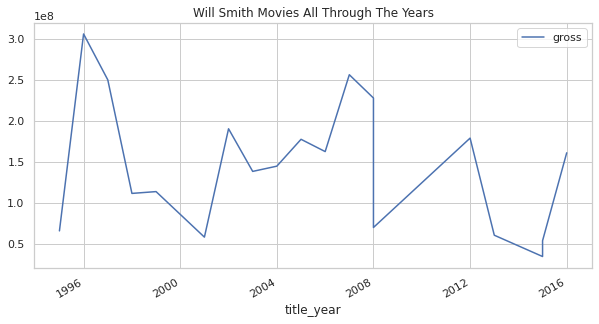

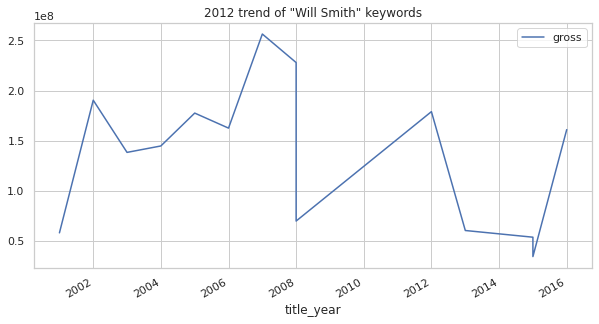

In [ ]:
#movie_data = pd.DataFrame(columns=['title_year'])
#movie_data = movie_data.astype({'title_year':np.datetime64})
#movie_data['title_year'] = movie_data.title_year.astype(np.datetime64)
#movie_data['title_year'] = movie_data.title_year.dt.year
#movie_data.set_index('title_year')

# Convert the date index to datetime
movie_data1['title_year'] = pd.to_datetime(movie_data1['title_year'], format='%Y')
will_smith = movie_data1.set_index('title_year')
print(will_smith)

# Plot the entire time series Will Smith and show gridlines
will_smith.plot(grid=True);
plt.title('Will Smith Movies All Through The Years');

will_smith_2000 = will_smith[will_smith.index.year > 2000]

# Plot Will Smith's > 2000 achievements
will_smith_2000.plot(grid=True);
plt.title('2012 trend of "Will Smith" keywords');

In [ ]:
#This dataset will focus on Will Smith and Johnny Depp's Years in Movies
movie_data_will = df_movie[df_movie["actor_1_name"] == 'Will Smith']
movie_data1_will = pd.DataFrame(movie_data_will, columns=['title_year'])
movie_data_johnny = df_movie[df_movie["actor_1_name"] == 'Johnny Depp']
movie_data1_johnny = pd.DataFrame(movie_data_johnny, columns=['title_year'])
print(movie_data1_will)
print(movie_data1_johnny)

      title_year
19        2012.0
71        1999.0
73        2016.0
116       2008.0
117       2007.0
152       2002.0
190       2003.0
197       2013.0
272       2001.0
274       2004.0
352       1997.0
409       1998.0
522       1996.0
673       2015.0
842       2005.0
851       2006.0
893       2008.0
1468      2015.0
2052      1995.0
      title_year
1         2007.0
13        2006.0
14        2013.0
18        2011.0
33        2010.0
106       2016.0
118       2005.0
134       2012.0
181       2011.0
205       2003.0
289       2009.0
305       2010.0
343       2014.0
807       2015.0
905       2015.0
945       2014.0
1096      2001.0
1240      2004.0
1354      1999.0
1420      1984.0
1436      1997.0
1449      2001.0
1519      1999.0
1629      2001.0
1642      2005.0
1753      2003.0
1898      2004.0
1946      1994.0
2117      2004.0
2177      1990.0
2389      1998.0
2449      1994.0
3058      1993.0
3170      2010.0
3582      1986.0
3709      1991.0
3817      2016.0
4104      2014

In [ ]:
# Convert the date index to datetime
movie_data1_will['title_year'] = pd.to_datetime(movie_data1_will['title_year'], format='%Y')
will_smith_index = movie_data1_will.set_index('title_year')

movie_data1_johnny['title_year'] = pd.to_datetime(movie_data1_johnny['title_year'], format='%Y')
johnny_depp_index = movie_data1_johnny.set_index('title_year')

print(will_smith_index)
print(johnny_depp_index)

Empty DataFrame
Columns: []
Index: [2012-01-01 00:00:00, 1999-01-01 00:00:00, 2016-01-01 00:00:00, 2008-01-01 00:00:00, 2007-01-01 00:00:00, 2002-01-01 00:00:00, 2003-01-01 00:00:00, 2013-01-01 00:00:00, 2001-01-01 00:00:00, 2004-01-01 00:00:00, 1997-01-01 00:00:00, 1998-01-01 00:00:00, 1996-01-01 00:00:00, 2015-01-01 00:00:00, 2005-01-01 00:00:00, 2006-01-01 00:00:00, 2008-01-01 00:00:00, 2015-01-01 00:00:00, 1995-01-01 00:00:00]
Empty DataFrame
Columns: []
Index: [2007-01-01 00:00:00, 2006-01-01 00:00:00, 2013-01-01 00:00:00, 2011-01-01 00:00:00, 2010-01-01 00:00:00, 2016-01-01 00:00:00, 2005-01-01 00:00:00, 2012-01-01 00:00:00, 2011-01-01 00:00:00, 2003-01-01 00:00:00, 2009-01-01 00:00:00, 2010-01-01 00:00:00, 2014-01-01 00:00:00, 2015-01-01 00:00:00, 2015-01-01 00:00:00, 2014-01-01 00:00:00, 2001-01-01 00:00:00, 2004-01-01 00:00:00, 1999-01-01 00:00:00, 1984-01-01 00:00:00, 1997-01-01 00:00:00, 2001-01-01 00:00:00, 1999-01-01 00:00:00, 2001-01-01 00:00:00, 2005-01-01 00:00:00, 2003

In [ ]:
# Convert the Will Smith and Johnny Depp index into sets
set_will_dates = set(will_smith_index.index)
set_johnny_dates = set(johnny_depp_index.index)

# Take the difference between the sets and print
print(set_will_dates - set_johnny_dates)

# Merge Will Smith and Johnny Depp DataFrame using join()
will_and_johnny = will_smith_index.join(johnny_depp_index, how='inner')

{Timestamp('1996-01-01 00:00:00'), Timestamp('1995-01-01 00:00:00'), Timestamp('2008-01-01 00:00:00'), Timestamp('2002-01-01 00:00:00')}


In [ ]:
movie_will = df_movie[df_movie["actor_1_name"] == 'Will Smith']
movie1_will = pd.DataFrame(movie_will, columns=['title_year', 'gross', 'budget'])
movie1_will['title_year'] = pd.to_datetime(movie1_will['title_year'], format='%Y')
will_smith_index1 = movie1_will.set_index('title_year')
will_smith_index1

,gross,budget
title_year,,
2012-01-01,179020854.0,225000000.0
1999-01-01,113745408.0,170000000.0
2016-01-01,161087183.0,175000000.0
2008-01-01,227946274.0,150000000.0
2007-01-01,256386216.0,150000000.0
2002-01-01,190418803.0,140000000.0
2003-01-01,138396624.0,130000000.0
2013-01-01,60522097.0,130000000.0
2001-01-01,58183966.0,107000000.0


               gross    budget
title_year                    
2012-01-01       NaN       NaN
1999-01-01 -0.364625 -0.244444
2016-01-01  0.416208  0.029412
2008-01-01  0.415049 -0.142857
2007-01-01  0.124766  0.000000
2002-01-01 -0.257297 -0.066667
2003-01-01 -0.273199 -0.071429
2013-01-01 -0.562691  0.000000
2001-01-01 -0.038633 -0.176923
2004-01-01  1.488578  0.121495
1997-01-01  0.727594 -0.250000
1998-01-01 -0.554086  0.000000
1996-01-01  1.744413 -0.166667
2015-01-01 -0.824101 -0.332000
2005-01-01  2.297777  0.397206
2006-01-01 -0.084410 -0.214286
2008-01-01 -0.569755  0.000000
2015-01-01 -0.506348 -0.363636
1995-01-01  0.905692 -0.457143
Correlation of Will Smith's Movie's Gross and Budget:  0.4008459065692696


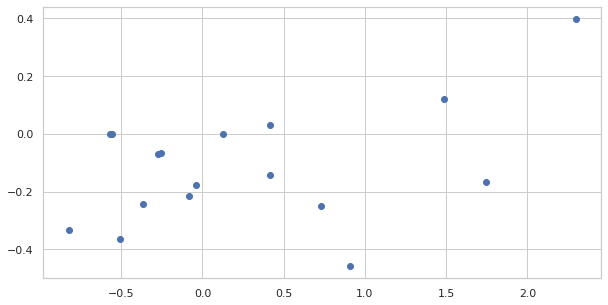

In [ ]:
# Compute percent change using pct_change()
returns = will_smith_index1.pct_change()
print(returns)

# Compute correlation using corr()
correlation = returns['gross'].corr(returns['budget'])
print("Correlation of Will Smith's Movie's Gross and Budget: ", correlation)

# Make scatter plot
plt.scatter(returns['gross'], returns['budget']);

# Part 3
## 3.1 Lecture Requirement

Identify an algorithm or method in performing a machine learning activity with the dataset you have chosen. Mention any papers, publications, or white papers about the properties, use, and theory behind the method. Provide an explanation of equations representing the algorithm.



## **Logistic Regression**

- When the assumptions of logistic regression analysis are not met, problems such as biased coefficient estimates or very large standard errors for the logistic regression coefficients may lead to invalid statistical inferences.

- In this demo, we go through each key assumption with code examples (on the Titanic dataset)

- Link to TowardsDataScience article: https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290

## 3.2 Lab Requirement

Present your solution implementing your algorithm of choice. You may use any library or package in this section. However, you are required to observe the following:

* Enforce object-oriented programming by implementing at least two of the pillars of OOP in the entirety of the solution.
* Dedicated functions for training, predicting, and evaluating the solution.
* A DataFrame of the metrics of the solution
* A visualization of the solution’s results.

In [ ]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
# the path is connected to the github just run this
# it's not needed to connect to your gdrive
class_grades_path ='https://github.com/keithvtls/AIDA2-Activities/blob/main/Laboratory%2001/class_grades.xlsx?raw=true'

# use in displaying the spreadsheet to pandas
train_df = pd.read_excel(class_grades_path)

train_df

,name,id,prelim_grades,midterm_grades,final_grades
0,alpha,1,94.960000,95.260,92.2192
1,aleph,2,94.960000,95.260,92.7792
2,beta,3,78.173333,94.360,84.3200
3,beth,4,78.173333,81.372,84.6400
4,cuprum,5,94.960000,95.260,92.2192
5,delta,6,84.826667,92.485,83.5792
6,eta,7,93.980000,97.300,95.6528
7,epsilon,8,60.788200,68.000,83.8672
8,foxtrot,9,94.306667,82.000,84.1472
9,gamma,10,96.406667,82.000,84.1472


In [ ]:
# check missing values in train data
train_df.isnull().sum()

name              0
id                0
prelim_grades     0
midterm_grades    0
final_grades      0
dtype: int64

In [ ]:
# path for the spreadsheet
classlists__path = 'https://github.com/keithvtls/AIDA2-Activities/blob/main/Laboratory%2001/classlists.xlsx?raw=true'

sheet_name1 = "class1" # first spreadsheet in classlists.xlsx
sheet_name2 = "class2" # second spreadsheet in classlists.xlsx

# use in displaying the spreadsheet to pandas
df_classlists1 = pd.read_excel(classlists__path, sheet_name1,header=None,names=['class1']) 
df_classlists2 = pd.read_excel(classlists__path, sheet_name2,header=None,names=['class2'])

# this is for class list 1 spreadsheet
df_classlists1

,class1
0,201009754
1,201009755
2,201009756
3,201009757
4,201009758
...,...
995,201108927
996,201005697
997,201005744
998,201109959


In [ ]:
df_classlists2

,class2
0,201103056
1,201105136
2,201002284
3,201104588
4,201004799
...,...
995,201101346
996,201007625
997,201003815
998,201102428


In [ ]:
def get_class_stats(data): # function for getting class stats

  # Libraries in helping to get the class stats
  import numpy as np
  from scipy import stats as st
  
  # Computation for getting the class stats
  mean = np.mean(data)
  median = np.median(data)
  mode = st.mode(data)
  std = np.std(data)
  return mean, median, mode, std

In [ ]:
# stats of prelim grades
p_grades = get_class_stats(df_class_grades['prelim_grades']) # overall prelim grades stats computation
df_p_grades = pd.DataFrame(p_grades) # making of dataframe
stats = ['mean', 'median', 'mode', 'standard deviation'] # new column containing the respective stats name
df_p_grades.insert(loc=0, column='Statistics', value=stats) # inserting the new column in the first column instead to the last column
df_p_grades.rename(columns={0:'Prelim Grades'}, inplace=True) # renaming the second column instead of 0

# showing the final result of dataframe
df_p_grades

,Statistics,Prelim Grades
0,mean,85.602304
1,median,84.826667
2,mode,"([78.1733333], [4])"
3,standard deviation,9.049271


In [ ]:
m_grades = get_class_stats(df_class_grades['midterm_grades']) # overall midterm grades stats computation
df_m_grades = pd.DataFrame(m_grades) # making of dataframe
stats = ['mean', 'median', 'mode', 'standard deviation'] # new column containing the respective stats name
df_m_grades.insert(loc=0, column='Statistics', value=stats) # inserting the new column in the first column instead to the last column
df_m_grades.rename(columns={0:'Midterm Grades'}, inplace=True) # renaming the second column instead of 0

# showing the final result of dataframe
df_m_grades

,Statistics,Midterm Grades
0,mean,89.456
1,median,92.485
2,mode,"([82.0], [4])"
3,standard deviation,7.045368


In [ ]:
class Section:

    def __init__(self,term):
        self.term_grade = term
        
    def get_failed(self):
        self.class_grades = df_class_grades
        self.check_fail = self.class_grades[(self.class_grades[self.term_grade] < 70)]
        self.show_students = self.check_fail[['name', self.term_grade]]
        return self.show_students
    
    def fail_count(self):
        return len(self.check_fail)

In [ ]:
term = 'prelim_grades' # By changing the term, the output will reveal who failed each term
failed_students = Section(term)
failed_students.get_failed()

,name,prelim_grades
7,epsilon,60.7882
19,neta,69.3140


In [ ]:
print(f'Number of students who failed in {term} is {failed_students.fail_count()}')

Number of students who failed in prelim_grades is 2
